Mandatory Assignment 2: Machine Learning
I have chosen the third part of the assignment, which involves predicting car prices using the Audi A1 listings dataset, available (https://www.kaggle.com/datasets/jacklacey/audi-a1-listings) on Kaggle. I renamed the dataset to audi_a1 for ease of use. The dataset is clean and easy to work with, making it ideal for this task. It includes several features that will help in predicting the price of a car.
The dataset contains the following attributes:

Year: The year the car was registered.
Type: Type of the vehicle (e.g., hatchback, sedan).
Mileage (miles): The mileage the car has driven.
Engine: The engine size in liters.
PS: Power in Pferdestärke (PS), which is close to horsepower.
Transmission: The type of transmission (e.g., manual, automatic).
Fuel: The fuel type (e.g., petrol, diesel).
Number_of_Owners: Number of previous owners.
Price (£): The price of the car in pounds sterling.
PPY: Price Per Year, calculated as the car’s price divided by its age.
Using these features, I aim to develop a machine learning model to predict the car's price.


In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.linear_model import LinearRegression


#Data Preprocessinon
df=pd.read_csv('audi_a1.csv',sep=',')

# Dropping columns that do not significantly contribute to price prediction
df_train= df.drop(columns=['index','href','MileageRank','PriceRank','PPYRank','Score','PPY'])
df_train.head(3)

,Year,Type,Mileage(miles),Engine,PS,Transmission,Fuel,Number_of_Owners,Price(£)
0,2018.0,Hatchback,44000.0,1.6L,114.398422,Manual,Diesel,1,14995.0
1,2016.0,Hatchback,42596.0,1.0L,93.688363,Manual,Petrol,3,10755.0
2,2015.0,Hatchback,42700.0,1.4L,123.274162,Manual,Petrol,2,10799.0


In [30]:
# Remove 'L' from the Engine column and convert to numeric
df_train['Engine']=df_train['Engine'].str.replace("L","")
df_train['Engine']=pd.to_numeric(df_train['Engine'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              471 non-null    float64
 1   Type              471 non-null    object 
 2   Mileage(miles)    471 non-null    float64
 3   Engine            471 non-null    float64
 4   PS                471 non-null    float64
 5   Transmission      471 non-null    object 
 6   Fuel              471 non-null    object 
 7   Number_of_Owners  471 non-null    int64  
 8   Price(£)          471 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 33.2+ KB


In [32]:
# Converting categorical variables (Type,Transmission, and Fuel) to numerical values.
# pd.get_dummies: This takes the "Type," "Transmission," and "Fuel" columns and creates new columns for each category.
# drop_first=True: This avoids creating a column for the first category, which helps prevent multicollinearity.

df = pd.get_dummies(df_train,columns=['Type','Transmission','Fuel'],drop_first=True)

# If 'Type' only has one unique value (like only 'Hatchback'), 
# don't apply drop_first=True to avoid losing the entire column.
if len(df_train['Type'].unique()) == 1:
    df['Type'] = 1  # Set it as 1 (since only one value exists)


df=df.astype(int)
print(df.info())
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 471 non-null    int64
 1   Mileage(miles)       471 non-null    int64
 2   Engine               471 non-null    int64
 3   PS                   471 non-null    int64
 4   Number_of_Owners     471 non-null    int64
 5   Price(£)             471 non-null    int64
 6   Transmission_Manual  471 non-null    int64
 7   Fuel_Petrol          471 non-null    int64
 8   Type                 471 non-null    int64
dtypes: int64(9)
memory usage: 33.2 KB
None


,Year,Mileage(miles),Engine,PS,Number_of_Owners,Price(£),Transmission_Manual,Fuel_Petrol,Type
0,2018,44000,1,114,1,14995,1,0,1


Correlation matrix

A correlation matrix shows how different factors (like year, mileage, engine size) affect the price of the car.
If a factor has a positive correlation with the price (between 0 and +1), it means that as this factor increases, the price also goes up. For example, a newer car might have a higher price.
If a factor has a negative correlation with the price (between 0 and -1), it means that as this factor increases, the price goes down. For example, higher mileage might decrease the car's price.


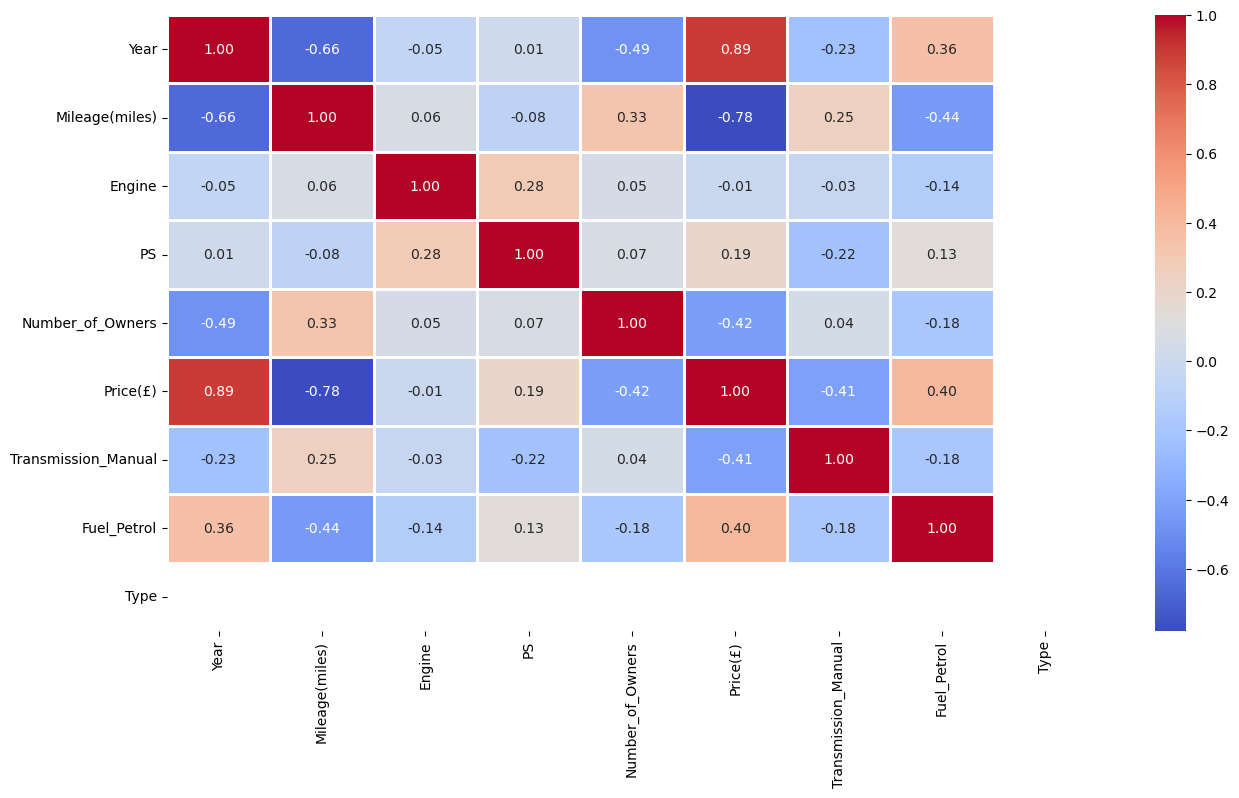

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.show()

In [13]:
y = df[['Price(£)']]  # Target variable: Price of the car
x = df[['Year', 'Mileage(miles)', 'Engine', 'PS', 'Number_of_Owners', 'Transmission_Manual', 'Fuel_Petrol','Type']]  # independent variables
#x=df.drop('Price(£)', axis=1), drop the 'Price(£)' column from df to get the features


# Create a Linear Regression model
lm = LinearRegression()  # Instantiate the LinearRegression class
model = lm.fit(x, y)  # Fit the model to the data (x as features and y as target)

In [18]:
# Now we can predict the price of an Audi A1 with the following features:
# Year: 2017
# Mileage: 50,000 miles
# Engine: 1.6L
# PS: 114
# Number of Owners: 2
# Transmission: Manual (encoded as 1)
# Fuel Type: Diesel (encoded as 0)
# Type Hatchback

model.predict([[2017,50000,1.6,114,2,1,0,1]])

c:\Users\nacig\miniconda3\envs\dave3625\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[13301.0493181]])

In [19]:
model.score(x,y)

0.9074454714893638

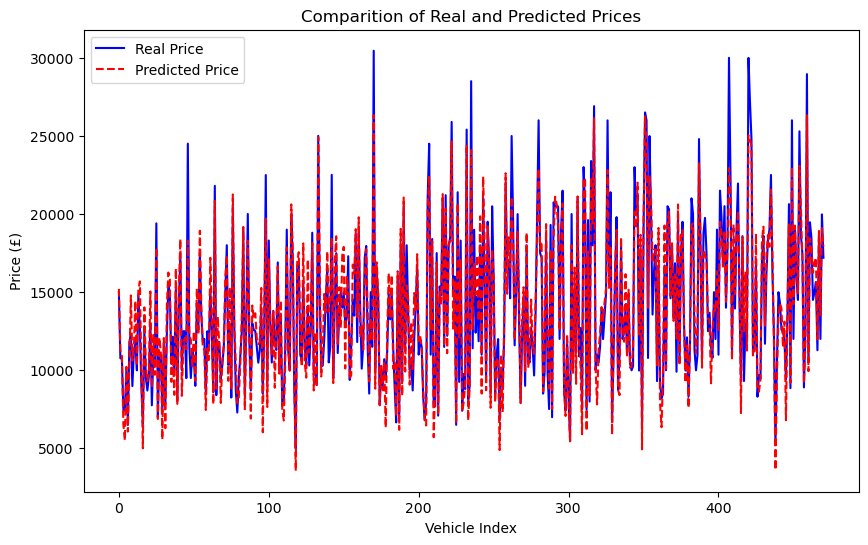

In [23]:
y_true=y
y_pred=model.predict(x)

plt.figure(figsize=(10,6))
plt.plot(y_true,label='Real Price',color='blue')
plt.plot(y_pred,label='Predicted Price', color='red', linestyle='--')
plt.title('Comparition of Real and Predicted Prices')
plt.xlabel('Vehicle Index')
plt.ylabel('Price (£)')
plt.legend()
plt.show()